In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
%matplotlib inline
sns.set_style('white')

In [3]:
df_titanic_train = pd.read_csv('titanic_train.csv')
df_titanic_test = pd.read_csv('titanic_test.csv')
df_titanic_gender = pd.read_csv('titanic_gender_submission.csv')

In [4]:
df_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# df_titanic_test.head()

In [7]:
# df_titanic_gender.head()

In [8]:
df_titanic_train = df_titanic_train.drop(['Ticket', 'Cabin','Name'], axis=1)
df_titanic_test = df_titanic_test.drop(['Ticket', 'Cabin','Name'], axis=1)

In [9]:
df_titanic_train = df_titanic_train.dropna()
df_titanic_test = df_titanic_test.dropna()

In [10]:
df_titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


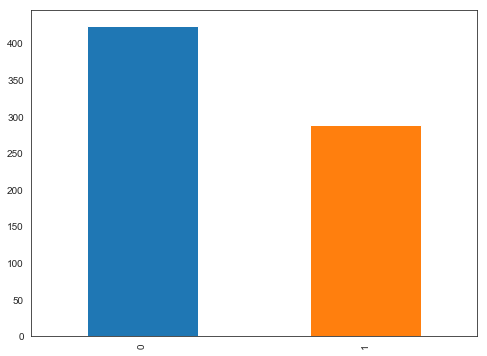

In [11]:
plt.figure(figsize=(8,6))
survived = df_titanic_train.Survived.value_counts()
survived.plot(kind='bar')
plt.show()

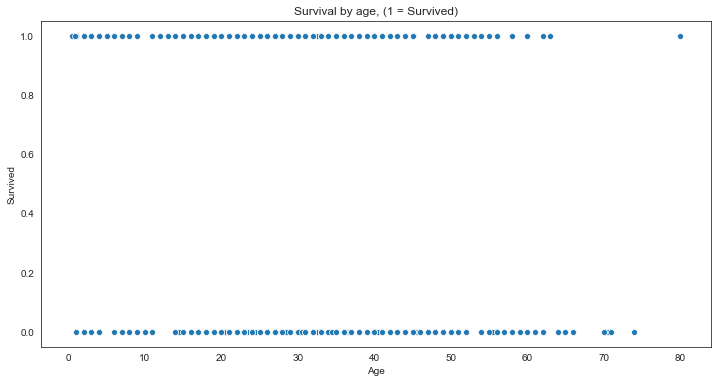

In [12]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age',y='Survived', data=df_titanic_train)
plt.title("Survival by age, (1 = Survived)")    
plt.show()

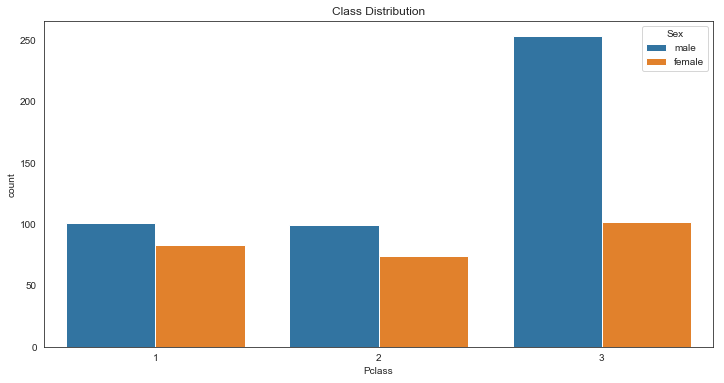

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='Pclass', hue='Sex', data=df_titanic_train)
plt.title("Class Distribution")
plt.show()

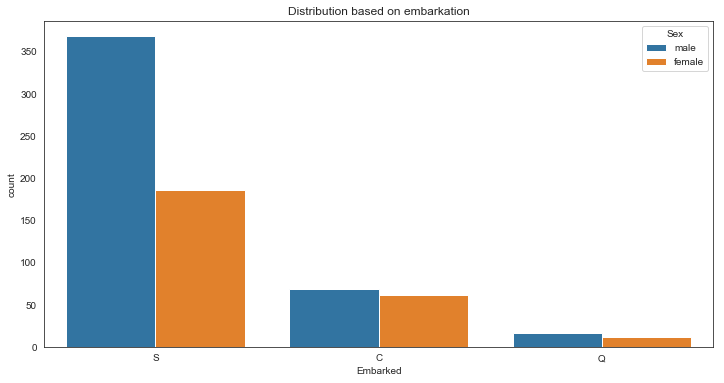

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='Embarked', hue='Sex', data=df_titanic_train)
plt.title("Distribution based on embarkation")
plt.show()

In [15]:
df_titanic_train_age = df_titanic_train[['Age','Survived']].dropna()

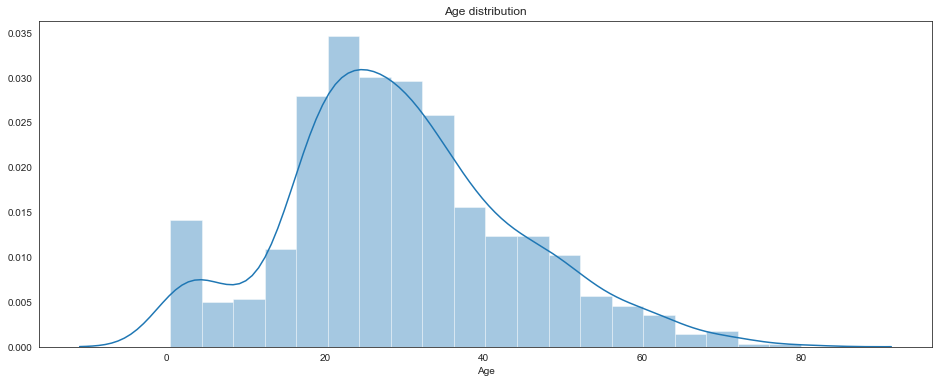

Mean age:  29.64209269662921


In [16]:
plt.figure(figsize=(16,6))
sns.distplot(df_titanic_train_age.Age)
plt.title("Age distribution")    
plt.show()
print('Mean age: ',df_titanic_train_age.Age.mean())

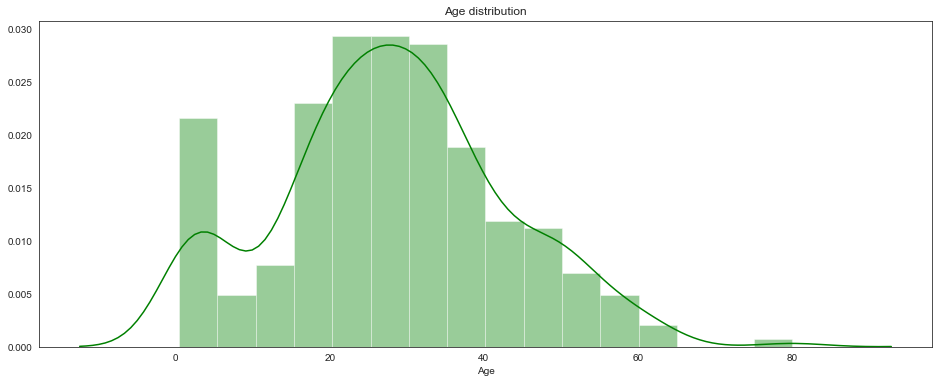

Mean age:  28.19329861111111


In [17]:
plt.figure(figsize=(16,6))
sns.distplot(df_titanic_train_age[df_titanic_train_age['Survived'] == 1].Age, color='green')
plt.title("Age distribution")    
plt.show()
print('Mean age: ',df_titanic_train_age[df_titanic_train_age['Survived'] == 1].Age.mean())

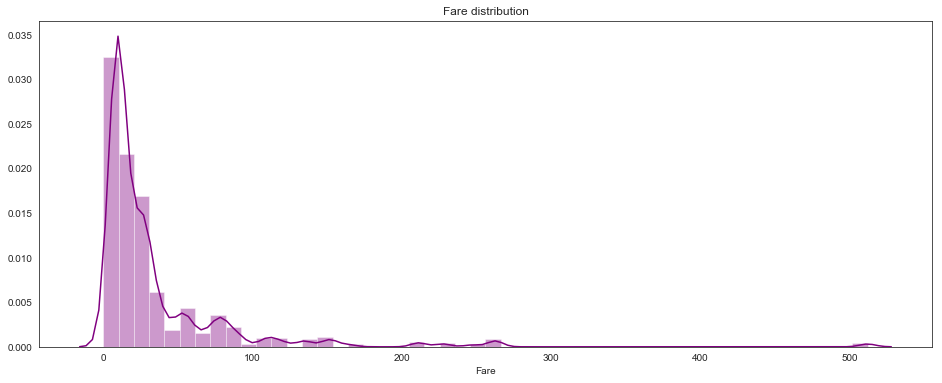

Mean age:  28.19329861111111


In [18]:
plt.figure(figsize=(16,6))
sns.distplot(df_titanic_train.Fare, color='purple')
plt.title("Fare distribution")    
plt.show()
print('Mean age: ',df_titanic_train_age[df_titanic_train_age['Survived'] == 1].Age.mean())

In [19]:
df_titanic_train[df_titanic_train['Fare'] > 250]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,28,0,1,male,19.0,3,2,263.0000,S
88,89,1,1,female,23.0,3,2,263.0000,S
258,259,1,1,female,35.0,0,0,512.3292,C
311,312,1,1,female,18.0,2,2,262.3750,C
341,342,1,1,female,24.0,3,2,263.0000,S
438,439,0,1,male,64.0,1,4,263.0000,S
679,680,1,1,male,36.0,0,1,512.3292,C
737,738,1,1,male,35.0,0,0,512.3292,C
742,743,1,1,female,21.0,2,2,262.3750,C


In [20]:
Pct_survived = df_titanic_train.Survived.value_counts()[0] / df_titanic_train.shape[0]
print('% of people survived: ', Pct_survived)

% of people survived:  0.5955056179775281


In [21]:
# Need a graph that shows % of survivors by gender, class
plt.figure(figsize=(16,6))

plt.show()

<Figure size 1152x432 with 0 Axes>

In [22]:
pd.cut(df_titanic_train['Age'], 6).head()

0    (13.683, 26.947]
1     (26.947, 40.21]
2    (13.683, 26.947]
3     (26.947, 40.21]
4     (26.947, 40.21]
Name: Age, dtype: category
Categories (6, interval[float64]): [(0.34, 13.683] < (13.683, 26.947] < (26.947, 40.21] < (40.21, 53.473] < (53.473, 66.737] < (66.737, 80.0]]

In [23]:
# create an age group feature
# age range ""<13","13-17","18-29","30-54","55+"
df_titanic_train['Age_range'] = pd.cut(df_titanic_train['Age'], 8)
df_titanic_test['Age_range'] = pd.cut(df_titanic_test['Age'], 8)

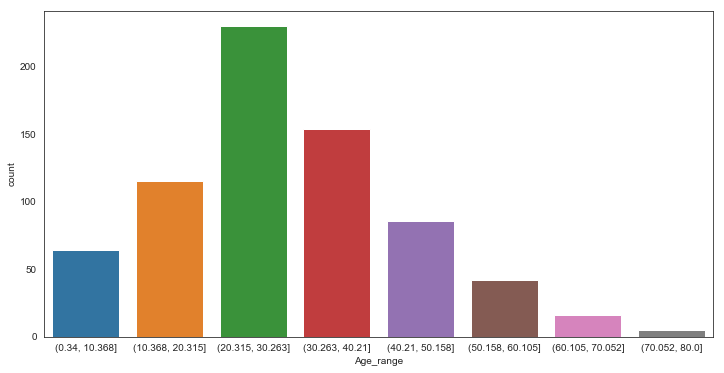

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age_range', data=df_titanic_train)
plt.show()

In [25]:
# create a fare bucket
df_titanic_train['Fare_range'] = pd.cut(df_titanic_train['Fare'], 20)
df_titanic_test['Fare_range'] = pd.cut(df_titanic_test['Fare'], 20)

In [26]:
pd.cut(df_titanic_train['Fare'], 20).head()

0    (-0.512, 25.616]
1    (51.233, 76.849]
2    (-0.512, 25.616]
3    (51.233, 76.849]
4    (-0.512, 25.616]
Name: Fare, dtype: category
Categories (20, interval[float64]): [(-0.512, 25.616] < (25.616, 51.233] < (51.233, 76.849] < (76.849, 102.466] ... (409.863, 435.48] < (435.48, 461.096] < (461.096, 486.713] < (486.713, 512.329]]

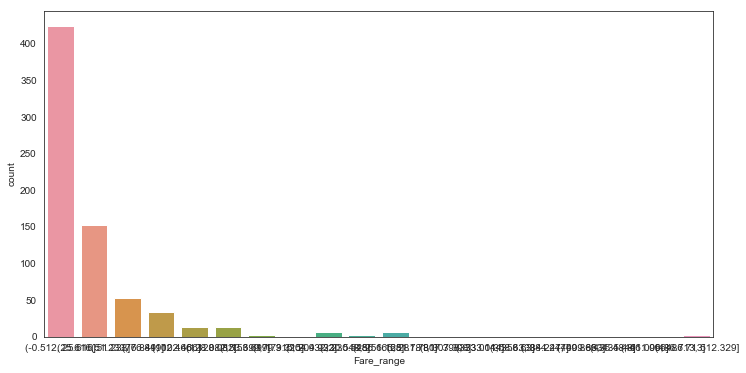

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='Fare_range', data=df_titanic_train)
plt.show()

In [28]:
# create a total party feature
df_titanic_train['Party_size'] = df_titanic_train.SibSp + df_titanic_train.Parch + 1
df_titanic_test['Party_size'] = df_titanic_test.SibSp + df_titanic_test.Parch + 1

In [29]:
df_titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_range,Fare_range,Party_size
0,1,0,3,male,22.0,1,0,7.2500,S,"(20.315, 30.263]","(-0.512, 25.616]",2
1,2,1,1,female,38.0,1,0,71.2833,C,"(30.263, 40.21]","(51.233, 76.849]",2
2,3,1,3,female,26.0,0,0,7.9250,S,"(20.315, 30.263]","(-0.512, 25.616]",1
3,4,1,1,female,35.0,1,0,53.1000,S,"(30.263, 40.21]","(51.233, 76.849]",2
4,5,0,3,male,35.0,0,0,8.0500,S,"(30.263, 40.21]","(-0.512, 25.616]",1


In [30]:
df_titanic_train = pd.get_dummies(df_titanic_train)
df_titanic_test = pd.get_dummies(df_titanic_test)

In [31]:
df_titanic_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Party_size,Sex_female,Sex_male,...,"Fare_range_(256.165, 281.781]","Fare_range_(281.781, 307.398]","Fare_range_(307.398, 333.014]","Fare_range_(333.014, 358.63]","Fare_range_(358.63, 384.247]","Fare_range_(384.247, 409.863]","Fare_range_(409.863, 435.48]","Fare_range_(435.48, 461.096]","Fare_range_(461.096, 486.713]","Fare_range_(486.713, 512.329]"
0,1,0,3,22.0,1,0,7.2500,2,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,38.0,1,0,71.2833,2,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,2,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1,...,0,0,0,0,0,0,0,0,0,0


Additional features could be title from the name (i.e. Miss, Sir, Captain, etc.); instead of removing cabin and ticket, identify if they have a cabin or ticket as a category.

In [73]:
# need to standardize data for regularized regression
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_titanic_train_scaled = pd.DataFrame(scaler.fit_transform(df_titanic_train), columns=df_titanic_train.columns)

### Logistic regression model

In [76]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100)
y = df_titanic_train_scaled['Survived']
X = df_titanic_train_scaled.drop('Survived', 1)

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients: ')
print(fit.coef_)
print('Intercept: ', fit.intercept_)
pred_y = lr.predict(X)

print('\n Accuracy by survival status')
print(pd.crosstab(pred_y, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients: 
[[ 0.12438777 -2.02286    -1.09542191 -0.34231275  0.08659265 -0.23201661
  -0.2557201   1.42267442 -1.42267442  0.45162535 -0.46749051  0.01586516
   0.30085261 -1.11948419 -0.87684553 -0.08972419 -0.15982545  0.08141478
   0.02516411  1.21097389 -2.20931149 -1.93054847 -0.64566106 -0.89598371
  -0.58851515 -1.49912227  1.95877925  0.         -0.31011279 -0.97087024
   1.38161171  0.          0.          0.          0.          0.
   0.          0.          0.          5.70973423]]
Intercept:  [-0.62747398]

 Accuracy by survival status
Survived  0.0  1.0
row_0             
0.0       366   71
1.0        58  217

 Percentage accuracy
0.8188202247191011


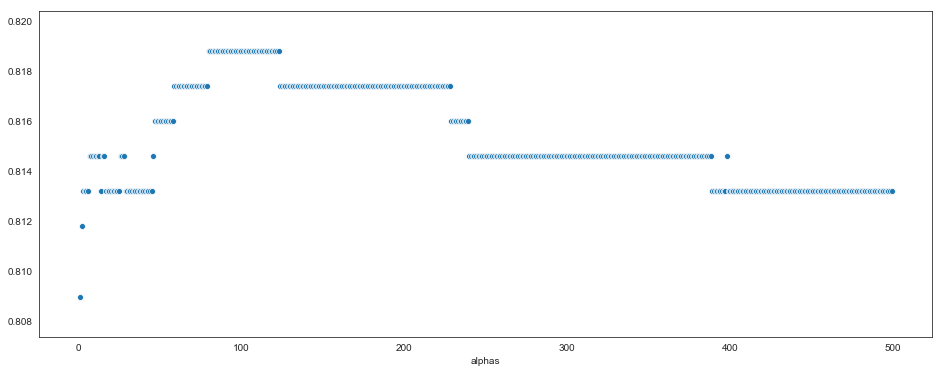

In [77]:
scores = []
for x in range(1,500):
    lr = LogisticRegression(C= x)
    fit = lr.fit(X, y)
    scores.append(lr.score(X, y))

plt.figure(figsize=(16,6))
sns.scatterplot(x=range(1,500), y=scores)
plt.xlabel('alphas')
plt.show()

In [78]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X, y, cv=5)

array([0.67132867, 0.83216783, 0.76223776, 0.76760563, 0.78723404])

### Ridge regression model

In [80]:
from sklearn.linear_model import RidgeClassifier
Ridger = RidgeClassifier(alpha=0.1)

# Fit the model.
fit = Ridger.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_ridge = Ridger.predict(X)

print('\n Accuracy by survival status')
print(pd.crosstab(pred_y_ridge, y))

print('\n Percentage accuracy')
print(Ridger.score(X, y))

Coefficients
[[ 0.03858628 -0.65204004 -0.32884302 -0.08179881  0.01431762 -0.06170379
  -0.06748119  0.49746934 -0.49746934  0.12456027 -0.11395844 -0.01060183
   0.10657947 -0.31258126 -0.24762088 -0.0158768  -0.01819478  0.05706831
   0.02667201  0.40395392 -0.51052624 -0.44986789 -0.10330251 -0.17760327
  -0.10510832 -0.31311331  0.16469889  0.         -0.01187307 -0.22079242
   0.39559035  0.          0.          0.          0.          0.
   0.          0.          0.          1.3318978 ]]
[-0.29340974]

 Accuracy by survival status
Survived  0.0  1.0
row_0             
0.0       370   79
1.0        54  209

 Percentage accuracy
0.8132022471910112


In [81]:
cross_val_score(Ridger, X, y, cv=5)

array([0.69230769, 0.83216783, 0.77622378, 0.76056338, 0.80141844])

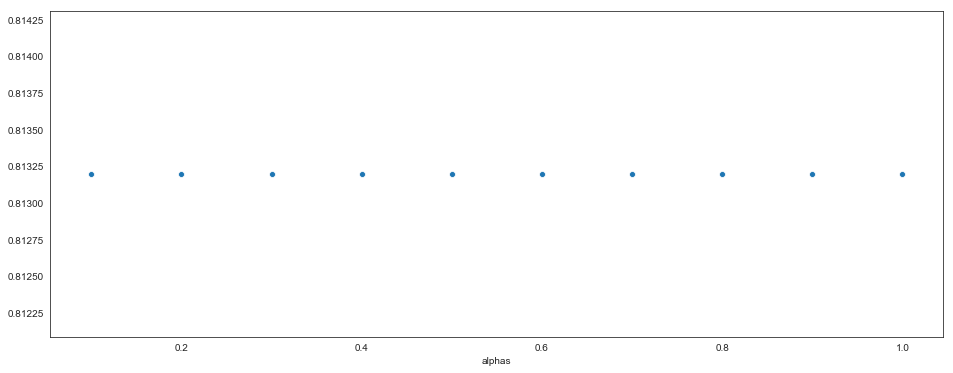

In [82]:
alphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

scores = []
for x in alphas:
    Ridger = RidgeClassifier(alpha=x)
    fit = Ridger.fit(X, y)
    scores.append(lr.score(X, y))

plt.figure(figsize=(16,6))
sns.scatterplot(x=alphas, y=scores)
plt.xlabel('alphas')
plt.show()

### Lasso regression model

In [85]:
from sklearn.linear_model import Lasso
lassor = LogisticRegression(penalty='l1',C=100)

# Fit the model.
fit = lassor.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_lasso = lassor.predict(X)

print('\n Accuracy by survival status')
print(pd.crosstab(pred_y_lasso, y))

print('\n Percentage accuracy')
print(lassor.score(X, y))

Coefficients
[[ 1.23037858e-01 -2.06410085e+00 -1.11259526e+00 -4.52352502e-01
  -1.94351625e-02 -4.11205805e-01 -1.34171547e-01  1.02888976e+00
  -1.82428038e+00  4.47458488e-01 -4.92679856e-01  0.00000000e+00
   2.29438707e-01 -1.18606525e+00 -9.31899233e-01 -1.42500771e-01
  -2.00256006e-01  4.58825248e-02  0.00000000e+00  1.25713245e+00
  -2.28156754e+00 -1.89930346e+00 -3.94294418e-01 -4.94487708e-01
   6.38552027e-03 -6.55019343e-01  3.63258644e+00  0.00000000e+00
   1.01636803e+00  5.49030893e-01  3.02679345e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.09658913e+01]]
[-0.60073332]

 Accuracy by survival status
Survived  0.0  1.0
row_0             
0.0       363   72
1.0        61  216

 Percentage accuracy
0.8132022471910112


In [84]:
cross_val_score(lassor, X, y, cv=5)

array([0.71328671, 0.82517483, 0.76223776, 0.78873239, 0.80851064])

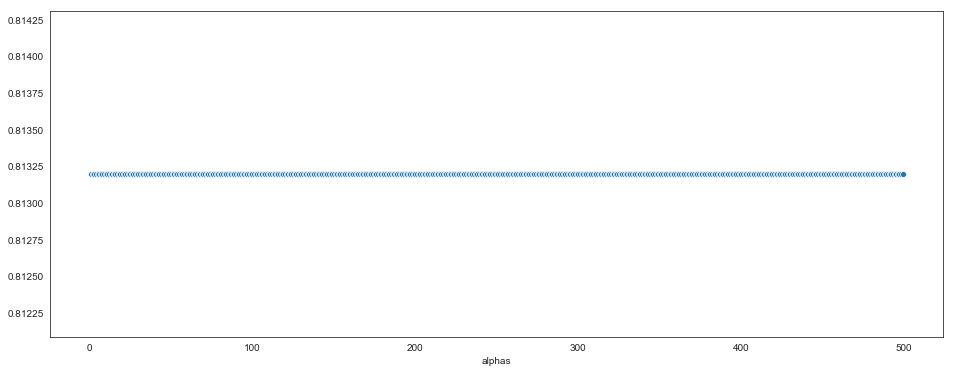

In [86]:
scores = []
for x in range(1,500):
    lassor = LogisticRegression(penalty='l1',C= x)
    fit = lassor.fit(X, y)
    scores.append(lr.score(X, y))

plt.figure(figsize=(16,6))
sns.scatterplot(x=range(1,500), y=scores)
plt.xlabel('alphas')
plt.show()